In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/apple_reviews_mapped.csv')

In [ ]:
df

,date,role,role_grouped,rating
0,2025-03-26,Apple Specialist,Product / Design,5.0
1,2025-03-26,Apple Specialist,Product / Design,5.0
2,2025-03-26,Operations Specialist,Product / Design,3.0
3,2025-03-25,Sales Specialist,Product / Design,5.0
4,2025-03-25,Specialist,Product / Design,4.0
...,...,...,...,...
401,2024-08-03,Client Advisor,Customer Support,5.0
402,2024-08-03,Lead,Management / PM,5.0
403,2024-08-02,Tech,Others,1.0
404,2024-08-01,Quality Control Technician,Engineering,5.0


<Figure size 1200x600 with 0 Axes>

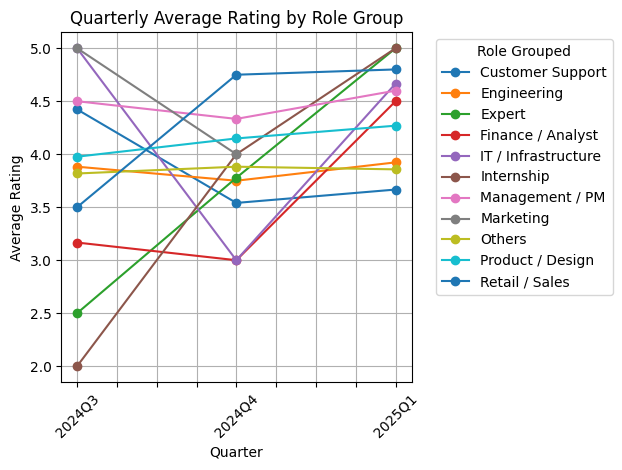

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. date 타입 변환 + 분기 컬럼 생성
df['date'] = pd.to_datetime(df['date'])
df['quarter'] = df['date'].dt.to_period('Q').astype(str)

# 2. 그룹핑 (role_grouped, 분기별)
grouped = df.groupby(['role_grouped', 'quarter'])['rating'].mean().reset_index()

# 3. 피벗 테이블 (선그래프용 포맷)
pivot_df = grouped.pivot(index='quarter', columns='role_grouped', values='rating')

# 4. 선그래프 그리기
plt.figure(figsize=(12, 6))
pivot_df.plot(marker='o')
plt.title('Quarterly Average Rating by Role Group')
plt.xlabel('Quarter')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Role Grouped', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

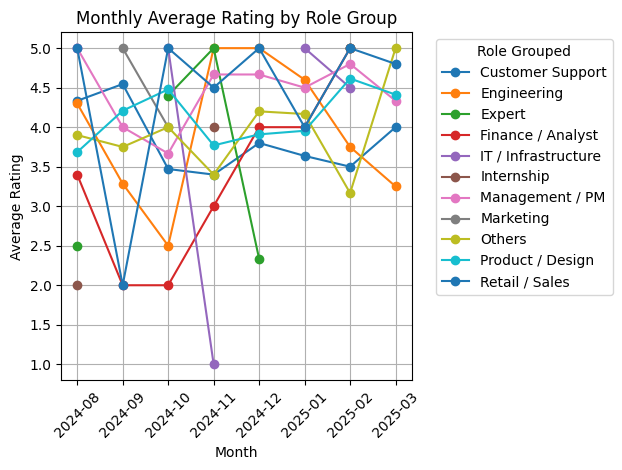

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 날짜 형식 변환 + 월 단위 추출
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M').astype(str)  # 예: '2025-03'

# 2. 그룹핑 (role_grouped, 월별)
grouped = df.groupby(['role_grouped', 'month'])['rating'].mean().reset_index()

# 3. 피벗 테이블 (선그래프용 포맷)
pivot_df = grouped.pivot(index='month', columns='role_grouped', values='rating')

# 4. 선그래프 그리기
plt.figure(figsize=(12, 6))
pivot_df.plot(marker='o')
plt.title('Monthly Average Rating by Role Group')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Role Grouped', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## product/design 버전

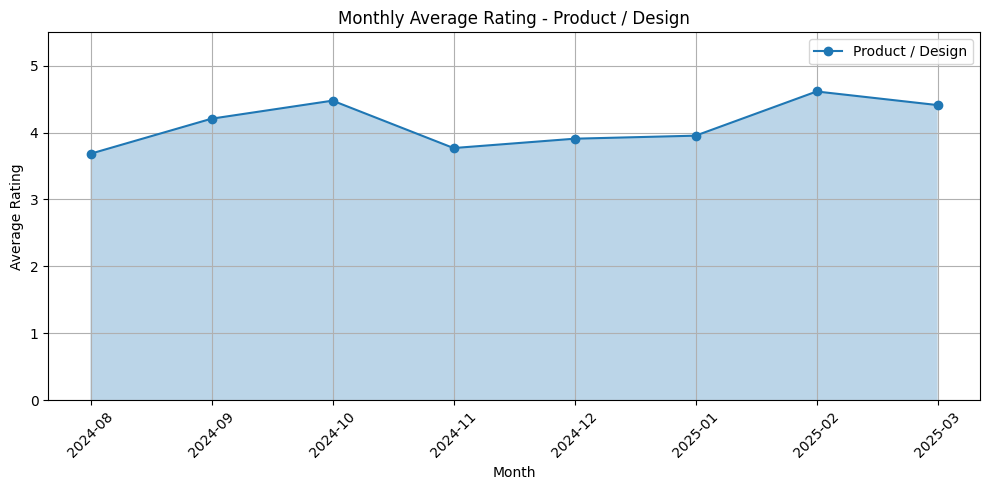

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 날짜 형식 변환 + 월 컬럼 만들기
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M').astype(str)

# 2. 'Product / Design'만 필터링
filtered_df = df[df['role_grouped'] == 'Product / Design']

# 3. 월별 평균 rating 계산
grouped = filtered_df.groupby('month')['rating'].mean().reset_index()

# 4. 시각화: 선 + 면적 채우기
plt.figure(figsize=(10, 5))
plt.plot(grouped['month'], grouped['rating'], marker='o', label='Product / Design')
plt.fill_between(grouped['month'], grouped['rating'], alpha=0.3)  # 면적 채우기

plt.title('Monthly Average Rating - Product / Design')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5.5)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


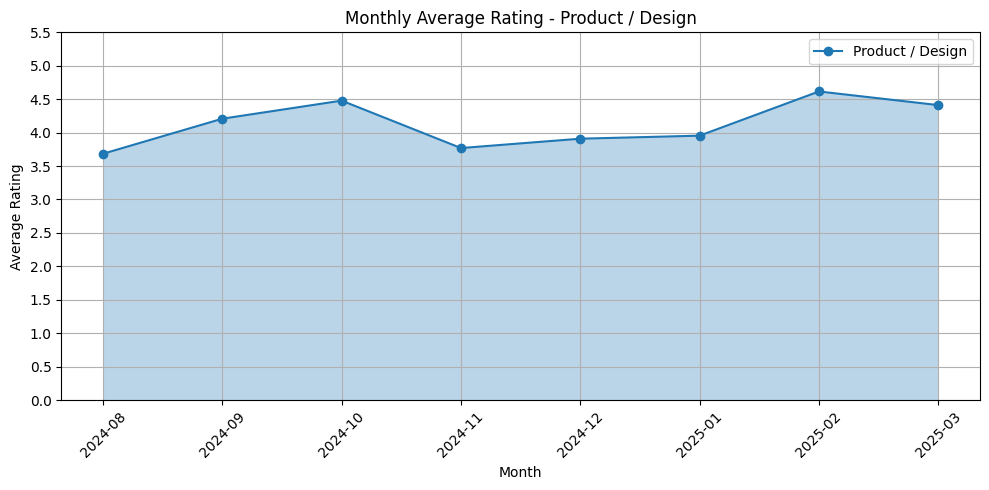

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 날짜 형식 변환 + 월 컬럼 만들기
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M').astype(str)

# 2. 'Product / Design'만 필터링
filtered_df = df[df['role_grouped'] == 'Product / Design']

# 3. 월별 평균 rating 계산
grouped = filtered_df.groupby('month')['rating'].mean().reset_index()

# 4. 시각화
plt.figure(figsize=(10, 5))
plt.plot(grouped['month'], grouped['rating'], marker='o', label='Product / Design')
plt.fill_between(grouped['month'], grouped['rating'], alpha=0.3)

plt.title('Monthly Average Rating - Product / Design')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 5.5 + 0.1, 0.5))  # 0.5 단위 간격
plt.ylim(0, 5.5)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
y_values_rounded = grouped['rating'].round(2).tolist()

print(y_values_rounded)

[3.68, 4.21, 4.48, 3.77, 3.91, 3.95, 4.62, 4.41]
